# Exploring Dandiset 000617: Allen Institute Openscope - Sequence Learning Project

**Version:** 0.250312.0130

---
*Disclaimer: This notebook was AI-generated and has not been fully verified. Please be cautious when interpreting the code or results. It is intended as a starting point for exploring the data.*
---

## Overview of the Dandiset

This notebook explores Dandiset [000617 (version 0.250312.0130)](https://dandiarchive.org/dandiset/000617/0.250312.0130), titled "Allen Institute Openscope - Sequence Learning Project".

**Dandiset Description (from metadata):**
> Adaptive and coordinated behavior requires that an animal be able to make predictions about the near and even far future. This intuition that some neural computations should be ‘predictive’ in their character has a long history... Our experimental design is based on a Sequence Learning Experiment, in which head-fixed mice passively view sequences of three different natural movie clips (labeled ‘A’, ‘B’, ‘C’)... Our design uses 2-photon microscopy with eight simultaneously recorded fields-of-view... The experiment used the Cux2-CreERTS2:Camk2a-tTa; Ai93(TITL-GCaMP6f) mouse line, which has expression in excitatory neurons of both layer 4 and 2/3.

This Dandiset contains data from two-photon calcium imaging experiments in mice during a sequence learning task. The data includes imaging data, processed fluorescence traces (dF/F), detected events, running speed, and stimulus information.

## Notebook Goals

This notebook aims to:
1. Demonstrate how to access and load Dandiset metadata and assets using the DANDI API.
2. Show how to load an NWB (Neurodata Without Borders) file from this Dandiset.
3. Provide an overview of the contents of an example NWB file.
4. Illustrate how to access and visualize key data types within the NWB file, such as:
    - Max projection image of the field of view.
    - Segmented ROI masks.
    - dF/F fluorescence traces for selected ROIs.
    - Animal's running speed.
5. Offer a starting point for users to conduct their own analyses on this Dandiset.

## Required Packages

To run this notebook, you will need the following Python packages installed. This notebook assumes they are already available in your environment.

- `dandi` (for DANDI API client)
- `pynwb` (for reading NWB files)
- `h5py` (dependency for pynwb with remfile)
- `remfile` (for streaming remote HDF5 files)
- `numpy`
- `pandas`
- `matplotlib`
- `seaborn`

## Loading Dandiset Information with DANDI API

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient
import pandas as pd # For displaying tables

# Connect to DANDI archive
client = DandiAPIClient()
dandiset_id = "000617"
dandiset_version = "0.250312.0130"
dandiset = client.get_dandiset(dandiset_id, dandiset_version)

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}") # This should be the API URL, not the web URL
print(f"Dandiset Web URL: https://dandiarchive.org/dandiset/{dandiset_id}/{dandiset_version}")
print(f"Dandiset Description: {metadata.get('description', 'N/A')[:500]}...") # Print first 500 chars

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier}, Size: {asset.size / (1024**2):.2f} MB)") # asset.identifier is asset_id

Dandiset name: Allen Institute Openscope - Sequence Learning Project
Dandiset URL: https://dandiarchive.org/dandiset/000617/0.250312.0130
Dandiset Web URL: https://dandiarchive.org/dandiset/000617/0.250312.0130
Dandiset Description: Adaptive and coordinated behavior requires that an animal be able to make predictions about the near and even far future. This intuition that some neural computations should be ‘predictive’ in their character has a long history, starting with ideas about how the receptive field structure of retinal ganglion cells relate to the statistics of natural visual scenes. Ideas about predictive computation have been most influential in thinking about the function of the neocortex. Here, the relatively st...
\nFirst 5 assets:
- sub-684475/sub-684475_ses-1294084428-acq-1294179945-raw-movies_ophys.nwb (ID: 3eaf1acf-7a63-4286-a7c0-7a58d8cae2f8, Size: 20185.73 MB)
- sub-684475/sub-684475_ses-1294084428-acq-1294179943-raw-movies_ophys.nwb (ID: 4cfa15bb-eac7-4273-9141-6d0c

## Loading an NWB File

We will now load one of the NWB files from the Dandiset. For this demonstration, we'll use the file `sub-677038/sub-677038_ses-1280089433-acq-1280384858_ophys.nwb`. This file has a manageable size for demonstration purposes. You can select other NWB files from the asset listing provided earlier and use their respective asset IDs to load them.

The URL for the chosen asset (`27dd7936-b3e7-45af-aca0-dc98b5954d19`) is used below.

In [2]:
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme() # Apply seaborn styling for most plots

# Define the URL for the NWB file
asset_id = "27dd7936-b3e7-45af-aca0-dc98b5954d19" # From previous asset listing explorations
nwb_file_url = f"https://api.dandiarchive.org/api/assets/{asset_id}/download/"
nwb_file_path_in_dandiset = "sub-677038/sub-677038_ses-1280089433-acq-1280384858_ophys.nwb" # For user reference

print(f"Loading NWB file: {nwb_file_path_in_dandiset}")
print(f"From URL: {nwb_file_url}")

# Load the NWB file using remfile for remote streaming
remote_f = remfile.File(nwb_file_url)
h5_f = h5py.File(remote_f, 'r')
io = pynwb.NWBHDF5IO(file=h5_f, mode='r', load_namespaces=True) # load_namespaces is good practice
nwbfile = io.read()

print("\\nNWB File Loaded Successfully.")
print(f"NWB File Identifier: {nwbfile.identifier}")
print(f"Session Description: {nwbfile.session_description}")
print(f"Session Start Time: {nwbfile.session_start_time}")

Loading NWB file: sub-677038/sub-677038_ses-1280089433-acq-1280384858_ophys.nwb
From URL: https://api.dandiarchive.org/api/assets/27dd7936-b3e7-45af-aca0-dc98b5954d19/download/


\nNWB File Loaded Successfully.
NWB File Identifier: 1280384858
Session Description: Ophys Session
Session Start Time: 2023-06-30 16:04:51.055000+00:00


## NWB File Contents Overview

Let's explore some of the key information and data structures within this NWB file.

You can explore this NWB file interactively on Neurosift:
[Neurosift L_000617 Asset {asset_id}](https://neurosift.app/nwb?url={nwb_file_url}&dandisetId={dandiset_id}&dandisetVersion={dandiset_version}) (replace placeholders if needed, already correct here)

### Imaging Plane Information
The `imaging_planes` group contains metadata about the imaging setup.

In [3]:
# Display Imaging Plane Information
if 'imaging_plane_1' in nwbfile.imaging_planes: # Check if the plane exists
    imaging_plane = nwbfile.imaging_planes['imaging_plane_1']
    print("Imaging Plane 'imaging_plane_1' Details:")
    print(f"  Description: {imaging_plane.description}")
    print(f"  Device: {imaging_plane.device.name if imaging_plane.device else 'N/A'}")
    print(f"  Excitation Lambda: {imaging_plane.excitation_lambda} nm")
    print(f"  Imaging Rate: {imaging_plane.imaging_rate} Hz")
    print(f"  Indicator: {imaging_plane.indicator}")
    print(f"  Location: {imaging_plane.location}")
    print(f"  Optical Channel name: {imaging_plane.optical_channel[0].name if imaging_plane.optical_channel else 'N/A'}") # Assuming one optical channel
else:
    print("Imaging plane 'imaging_plane_1' not found.")
    if nwbfile.imaging_planes:
        print(f"Available imaging planes: {list(nwbfile.imaging_planes.keys())}")

Imaging Plane 'imaging_plane_1' Details:
  Description: (512, 512) field of view in VISp at depth 175 um
  Device: MESO.2
  Excitation Lambda: 910.0 nm
  Imaging Rate: 10.0 Hz
  Indicator: GCaMP6f
  Location: VISp
  Optical Channel name: channel_1


### Region of Interest (ROI) Information

The NWB file contains information about segmented Regions of Interest (ROIs), typically representing detected cells. This is often stored in a `PlaneSegmentation` table, which we can view as a pandas DataFrame.

Key columns often include:
- `id`: A unique identifier for the ROI within this table.
- `image_mask`: A 2D boolean or weighted mask showing the pixels belonging to the ROI.
- `cell_specimen_id`: An ID that might be used to track cells across experiments (can be -1 if not applicable or not matched).
- `valid_roi`: A boolean flag indicating if the ROI is considered valid by the segmentation pipeline.

In [4]:
# Display Cell Specimen Table (ROI table)
try:
    # Path based on nwb-file-info: nwb.processing['ophys']['image_segmentation'].plane_segmentations['cell_specimen_table']
    roi_table_name = 'cell_specimen_table' # Common name
    if 'ophys' in nwbfile.processing and \
       'image_segmentation' in nwbfile.processing['ophys'].data_interfaces and \
       roi_table_name in nwbfile.processing['ophys'].data_interfaces['image_segmentation'].plane_segmentations:

        cell_specimen_table = nwbfile.processing['ophys'].data_interfaces['image_segmentation'].plane_segmentations[roi_table_name]
        roi_df = cell_specimen_table.to_dataframe()
        print(f"Displaying the first 5 rows of the '{roi_table_name}':")
        print(roi_df.head())
        print(f"\\nTotal number of ROIs: {len(roi_df)}")
        if 'valid_roi' in roi_df.columns:
            print(f"Number of 'valid_roi = True': {roi_df['valid_roi'].sum()}")
        if 'cell_specimen_id' in roi_df.columns:
             num_valid_csid = (roi_df['cell_specimen_id'] != -1).sum()
             print(f"Number of ROIs with cell_specimen_id != -1: {num_valid_csid}")
    else:
        print(f"Could not find ROI table at the expected path: processing/ophys/image_segmentation/plane_segmentations/{roi_table_name}")
        # Let's list available plane segmentations if the primary one is not found
        if 'ophys' in nwbfile.processing and 'image_segmentation' in nwbfile.processing['ophys'].data_interfaces:
            ps_keys = list(nwbfile.processing['ophys'].data_interfaces['image_segmentation'].plane_segmentations.keys())
            print(f"Available plane segmentations: {ps_keys}")


except Exception as e:
    print(f"Error accessing ROI table: {e}")

Displaying the first 5 rows of the 'cell_specimen_table':
            cell_specimen_id  height  mask_image_plane  max_correction_down  \
id                                                                            
1285902696                -1      22                 1                  4.0   
1285902717                -1      18                 1                  4.0   
1285902742                -1      19                 1                  4.0   
1285902805                -1      22                 0                  4.0   
1285902819                -1      20                 0                  4.0   

            max_correction_left  max_correction_right  max_correction_up  \
id                                                                         
1285902696                 18.0                   5.0               23.0   
1285902717                 18.0                   5.0               23.0   
1285902742                 18.0                   5.0               23.0   
12859028

## Visualizing NWB Data

Now, let's visualize some of the data.

### Maximum Projection Image
This image shows the maximum fluorescence intensity across all frames of the imaging session, providing an overview of the imaged field of view and the location of cells.
Note: Seaborn styling is not used for image plots as it can interfere with colormaps.

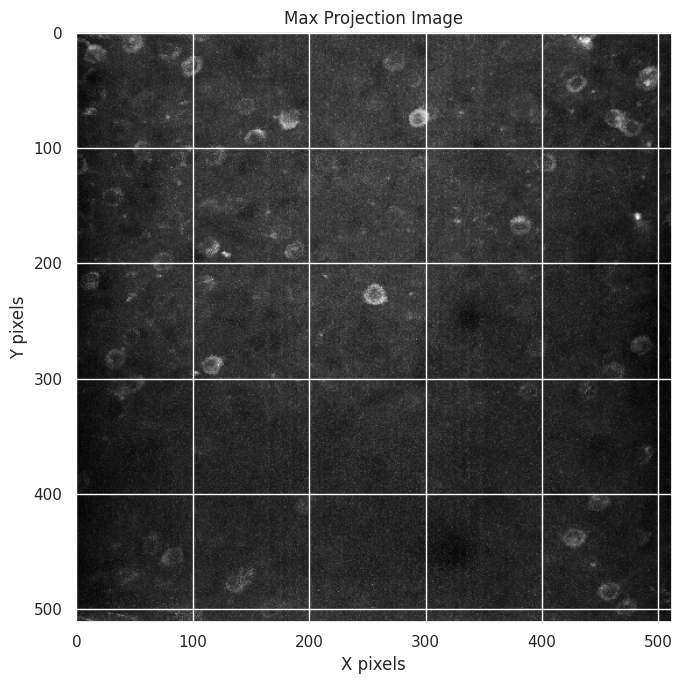

In [5]:
# Plot Max Projection Image
try:
    # Path from nwb-file-info: nwb.processing['ophys'].data_interfaces['images'].images['max_projection']
    if 'ophys' in nwbfile.processing and \
       'images' in nwbfile.processing['ophys'].data_interfaces and \
       'max_projection' in nwbfile.processing['ophys'].data_interfaces['images'].images:

        max_projection_image = nwbfile.processing['ophys'].data_interfaces['images'].images['max_projection']
        max_projection_data = max_projection_image.data[:]

        fig, ax = plt.subplots(figsize=(7, 7))
        ax.imshow(max_projection_data, cmap='gray', aspect='auto')
        ax.set_title('Max Projection Image')
        ax.set_xlabel('X pixels')
        ax.set_ylabel('Y pixels')
        plt.tight_layout()
        plt.show()
    else:
        print("Max projection image not found at the expected path.")

except Exception as e:
    print(f"Error plotting max projection image: {e}")

### Superimposed ROI Masks
This visualization shows the spatial layout of all segmented ROIs by overlaying their image masks.

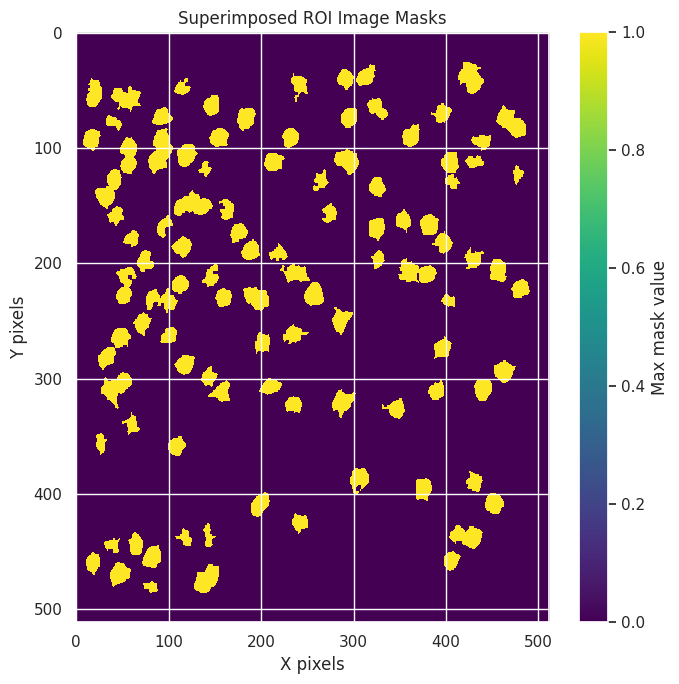

In [6]:
# Plot Superimposed ROI Masks
try:
    if 'ophys' in nwbfile.processing and \
       'image_segmentation' in nwbfile.processing['ophys'].data_interfaces and \
       roi_table_name in nwbfile.processing['ophys'].data_interfaces['image_segmentation'].plane_segmentations:

        cell_table = nwbfile.processing['ophys'].data_interfaces['image_segmentation'].plane_segmentations[roi_table_name]
        image_masks_series = cell_table['image_mask']

        if len(image_masks_series) > 0:
            first_mask_shape = image_masks_series[0].shape
            composite_mask = np.zeros(first_mask_shape, dtype=float)

            for i in range(len(image_masks_series)): # Iterate using index
                mask = image_masks_series[i]
                composite_mask = np.maximum(composite_mask, mask.astype(float))

            fig, ax = plt.subplots(figsize=(7, 7))
            im = ax.imshow(composite_mask, cmap='viridis', interpolation='nearest', aspect='auto')
            ax.set_title('Superimposed ROI Image Masks')
            ax.set_xlabel('X pixels')
            ax.set_ylabel('Y pixels')
            plt.colorbar(im, ax=ax, label='Max mask value')
            plt.tight_layout()
            plt.show()
        else:
            print("No ROI masks found to plot.")
    else:
        print(f"ROI table '{roi_table_name}' not found for plotting masks.")

except Exception as e:
    print(f"Error plotting ROI masks: {e}")

### dF/F Fluorescence Traces

Delta F over F (dF/F) is a common measure of neural activity derived from calcium imaging. It represents the change in fluorescence relative to a baseline. Large, transient increases in dF/F (often called calcium transients) are typically interpreted as indicators of one or more action potentials occurring in the neuron. Let's plot the dF/F traces for a few selected ROIs.

We will select a few ROIs. If available, we prioritize those marked as `valid_roi = True`. Note that `cell_specimen_id` can sometimes be -1 even for ROIs marked as valid; this ID is for cross-session/experiment matching and -1 might mean it's unique to this session or not matched.

Plotting first 3 ROIs marked as 'valid_roi = True'.


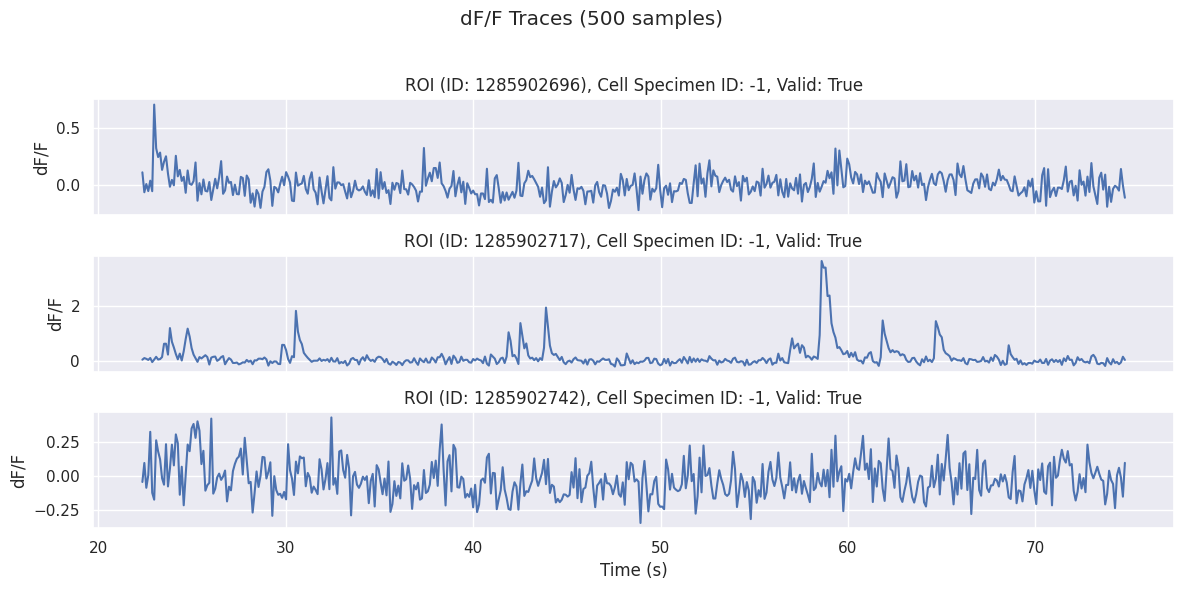

In [7]:
# Plot dF/F Traces for a few ROIs
try:
    if 'ophys' in nwbfile.processing and \
       'dff' in nwbfile.processing['ophys'].data_interfaces and \
       'traces' in nwbfile.processing['ophys'].data_interfaces['dff'].roi_response_series:

        dff_traces_obj = nwbfile.processing['ophys'].data_interfaces['dff'].roi_response_series['traces']
        dff_data = dff_traces_obj.data
        dff_timestamps = dff_traces_obj.timestamps[:]

        # Re-fetch ROI dataframe to ensure we have it
        if 'ophys' in nwbfile.processing and \
           'image_segmentation' in nwbfile.processing['ophys'].data_interfaces and \
           roi_table_name in nwbfile.processing['ophys'].data_interfaces['image_segmentation'].plane_segmentations:
            
            cell_table_df_for_dff = nwbfile.processing['ophys'].data_interfaces['image_segmentation'].plane_segmentations[roi_table_name].to_dataframe()

            num_rois_to_plot = 3
            time_points_to_plot = 500  # Approx 50 seconds at 10 Hz

            selected_rois_df_for_dff = pd.DataFrame() # Initialize
            if 'valid_roi' in cell_table_df_for_dff.columns:
                valid_rois_df = cell_table_df_for_dff[cell_table_df_for_dff['valid_roi'] == True]
                if len(valid_rois_df) >= num_rois_to_plot:
                    selected_rois_df_for_dff = valid_rois_df.head(num_rois_to_plot)
                    print(f"Plotting first {num_rois_to_plot} ROIs marked as 'valid_roi = True'.")
                else: # Not enough valid, take from all
                    selected_rois_df_for_dff = cell_table_df_for_dff.head(num_rois_to_plot)
                    print(f"Not enough 'valid_roi = True' ROIs found. Plotting first {num_rois_to_plot} ROIs from the table.")
            else: # 'valid_roi' column doesn't exist
                selected_rois_df_for_dff = cell_table_df_for_dff.head(num_rois_to_plot)
                print(f"Column 'valid_roi' not found. Plotting first {num_rois_to_plot} ROIs from the table.")
            
            if not selected_rois_df_for_dff.empty:
                # Get 0-based column indices for dff_data
                all_roi_ids_in_table_order = nwbfile.processing['ophys'].data_interfaces['image_segmentation'].plane_segmentations[roi_table_name].id[:]
                selected_roi_actual_ids = selected_rois_df_for_dff.index 
                selected_column_indices = [np.where(all_roi_ids_in_table_order == roi_id)[0][0] for roi_id in selected_roi_actual_ids]

                fig, axes = plt.subplots(num_rois_to_plot, 1, figsize=(12, 2 * num_rois_to_plot), sharex=True, squeeze=False) # squeeze=False ensures axes is 2D

                for i, (original_id, col_idx) in enumerate(zip(selected_roi_actual_ids, selected_column_indices)):
                    trace = dff_data[:time_points_to_plot, col_idx]
                    timestamps_subset = dff_timestamps[:time_points_to_plot]
                    axes[i, 0].plot(timestamps_subset, trace)
                    
                    roi_details = selected_rois_df_for_dff.loc[original_id]
                    cs_id = roi_details.get('cell_specimen_id', 'N/A')
                    valid_stat = roi_details.get('valid_roi', 'N/A')
                    axes[i, 0].set_title(f"ROI (ID: {original_id}), Cell Specimen ID: {cs_id}, Valid: {valid_stat}")
                    axes[i, 0].set_ylabel("dF/F")

                axes[-1, 0].set_xlabel("Time (s)")
                plt.suptitle(f"dF/F Traces ({time_points_to_plot} samples)")
                plt.tight_layout(rect=[0, 0, 1, 0.96])
                plt.show()
            else:
                print("No ROIs selected for plotting dF/F traces.")
        else:
            print(f"ROI table '{roi_table_name}' not found for selecting ROIs for dF/F traces.")
    else:
        print("dF/F data not found at the expected path.")

except Exception as e:
    print(f"Error plotting dF/F traces: {e}")

### Stimulus Information
The NWB file contains information about the stimuli presented during the experiment. This is often stored in the `intervals` attribute of the NWB file, where each key represents a different type of stimulus or experimental epoch. Let's list the available stimulus presentation tables and look at the first few entries of one.

In [8]:
# List available stimulus presentation tables
if nwbfile.intervals:
    print("Available stimulus presentation tables (nwbfile.intervals):")
    for key in nwbfile.intervals.keys():
        print(f"- {key}")
else:
    print("No stimulus intervals found in nwbfile.intervals.")

# Display head of one stimulus table, e.g., movie_clip_A_presentations
# The nwb-file-info showed 'movie_clip_A_presentations', 'movie_clip_B_presentations', etc.
stimulus_table_to_show = 'movie_clip_A_presentations' 
if nwbfile.intervals and stimulus_table_to_show in nwbfile.intervals:
    try:
        stim_df = nwbfile.intervals[stimulus_table_to_show].to_dataframe()
        print(f"\\nFirst 5 entries for '{stimulus_table_to_show}':")
        print(stim_df.head())
    except Exception as e:
        print(f"Error displaying dataframe for '{stimulus_table_to_show}': {e}")
else:
    print(f"\\nStimulus table '{stimulus_table_to_show}' not found in nwbfile.intervals.")

Available stimulus presentation tables (nwbfile.intervals):
- gray_presentations
- movie_clip_A_presentations
- movie_clip_B_presentations
- movie_clip_C_presentations


\nFirst 5 entries for 'movie_clip_A_presentations':
    start_time  stop_time stimulus_name  stimulus_block  frame  \
id                                                               
0    22.908110  22.924791  movie_clip_A             0.0    0.0   
1    22.924791  22.941472  movie_clip_A             0.0    1.0   
2    22.941472  22.958153  movie_clip_A             0.0    2.0   
3    22.958153  22.974834  movie_clip_A             0.0    3.0   
4    22.974834  22.991515  movie_clip_A             0.0    4.0   

              color  contrast  opacity  orientation              size units  \
id                                                                            
0   [1.0, 1.0, 1.0]       1.0      1.0          0.0  [1920.0, 1080.0]   pix   
1   [1.0, 1.0, 1.0]       1.0      1.0          0.0  [1920.0, 1080.0]   pix   
2   [1.0, 1.0, 1.0]       1.0      1.0          0.0  [1920.0, 1080.0]   pix   
3   [1.0, 1.0, 1.0]       1.0      1.0          0.0  [1920.0, 1080.0]   pix   
4   [1.0, 1

### Animal Running Speed
The NWB file may also contain behavioral data, such as the animal's running speed.

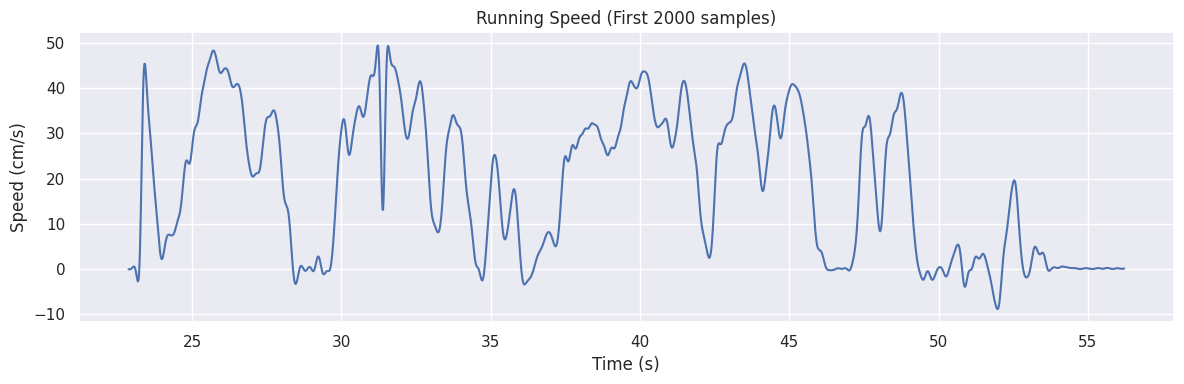

Plotted 2000 samples of running speed, corresponding to 33.34 seconds.


In [9]:
# Plot Running Speed
try:
    if 'running' in nwbfile.processing and \
       'speed' in nwbfile.processing['running'].data_interfaces:

        running_speed_ts = nwbfile.processing['running'].data_interfaces['speed']
        speed_data = running_speed_ts.data[:]
        speed_timestamps = running_speed_ts.timestamps[:]

        num_samples_to_plot = 2000 # Approx 33 seconds at 60Hz
        speed_subset = speed_data[:num_samples_to_plot]
        timestamps_subset = speed_timestamps[:num_samples_to_plot]

        fig, ax = plt.subplots(figsize=(12, 4))
        ax.plot(timestamps_subset, speed_subset)
        ax.set_title(f'Running Speed (First {num_samples_to_plot} samples)')
        ax.set_xlabel('Time (s)')
        ax.set_ylabel(f'Speed ({running_speed_ts.unit})')
        plt.tight_layout()
        plt.show()
        
        if len(timestamps_subset) > 1:
            actual_duration_plotted = timestamps_subset[-1] - timestamps_subset[0]
            print(f"Plotted {len(timestamps_subset)} samples of running speed, corresponding to {actual_duration_plotted:.2f} seconds.")
        elif len(timestamps_subset) == 1:
             print(f"Plotted 1 sample of running speed at time {timestamps_subset[0]:.2f} seconds.")
        else:
            print("No running speed data points to plot for the selected range.")

    else:
        print("Running speed data not found at the expected path.")

except Exception as e:
    print(f"Error plotting running speed: {e}")

## Summary and Future Directions

This notebook demonstrated how to access and load data from Dandiset 000617, focusing on a single NWB file. We visualized several key data types:
- The overall field of view using the max projection image.
- The location and shape of segmented cells (ROIs) using superimposed image masks.
- Neural activity proxies by plotting dF/F traces for selected ROIs.
- The animal's behavioral state by plotting its running speed.

### Possible Future Directions:
1.  **Correlate Neural Activity with Behavior:** Analyze dF/F traces in relation to running speed or specific stimulus presentations (from `nwbfile.stimulus` or `nwbfile.intervals`).
2.  **Analyze Event Data:** Explore the `event_detection` data (if available and of interest) in `nwbfile.processing['ophys']` which often contains deconvolved spike rates or event times.
3.  **Compare Across Sessions/Animals:** Extend this analysis to other NWB files within the Dandiset to compare neural activity patterns across different experimental conditions, days, or animals.
4.  **Examine Stimulus Responses:** The Dandiset involves sequence learning with movie clips. One could analyze how neural responses change to specific movie clips ('A', 'B', 'C') or during random vs. sequenced presentations. Stimulus presentation times are typically found in `nwbfile.intervals`.
5.  **Deeper dive into ROI properties:** Further analyze the `cell_specimen_table` for properties like ROI size, location, or specific `cell_specimen_id`s.

This notebook provides a basic toolkit. The rich data within this Dandiset offers numerous avenues for more in-depth neuroscientific investigation.

In [10]:
# Close the NWB file (optional, as it will be closed when io object is garbage collected)
# but good practice if you are done with it and want to free up resources explicitly.
try:
    io.close()
    print("\\nNWB file closed.")
except Exception as e:
    print(f"Error closing NWB file (it might have been closed already or not opened): {e}")

\nNWB file closed.
